# Project "The research of games success"

Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) up to 2016 are available from open sources. It is necessary to identify patterns that determine the success of the game. This will allow you to identify a potentially popular product and plan advertising campaigns for the online store for 2017.
The data set contains the abbreviation ESRB (Entertainment Software Rating Board), an association that determines the age rating of computer games. ESRB evaluates game content and assigns it a suitable age category, for example, "For adults", "For younger children" or "For teenagers".

Data description
* Name — the name of the game
* Platform — platform
* Year_of_Release — year of release
* Genre — the genre of the game
* NA_sales — sales in North America (millions of copies sold)
* EU_sales — sales in Europe (millions of copies sold)
* JP_sales — sales in Japan (millions of copies sold)
* Other_sales — sales in other countries (millions of copies sold)
* Critic_Score — critics' score (maximum 100)
* User_Score — users' score (maximum 10)
* Rating — rating from the ESRB organization (English Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.

Data for 2016 may be incomplete.

# Task details:

To solve this problem, we need to perform the following steps:

1) study the data and their specifics;

2) carry out their preliminary processing so that the results of the analysis reflect real patterns, and not distorted due to the presence of inaccuracies or errors in the data;

3) conducting research data analysis;

4) drawing up a portrait of the user of each region;

5) formation and verification of hypotheses;

6) the design of the general conclusion of the study.

## Preliminary data overview:

Import necessary libraries:

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Open provided file to see data:

In [66]:
games_df = pd.read_csv('/Users/a1/Desktop/data_folder/games.csv')
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [67]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [68]:
games_df.duplicated().sum()

0

In [69]:
games_df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Based on a preliminary assessment of the data, there are no obvious duplicates in it, although there are the following defects:
* incorrect column names in the table;
* incorrect data format in Year_of_Release, User_Score columns;
* there are gaps in the columns.

## Preparing data for analysis:

### Сhange the name of the columns to the correct format (clean code):

In [70]:
games_df.columns = games_df.columns.str.lower()
games_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Сheck the data for gaps:

Consider the gaps in the "name" column. To do this, we will determine the number of unique names of games.

In [71]:
len(games_df['name'].unique())

11560

The "name" column contains data on the names of 11560 games. Since only two names of games are missing, which are categorical values that we cannot restore using the available data, we will delete these lines from the dataset.

In [72]:
games_df.dropna(subset=['name'], inplace=True)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Consider the gaps in the "year_of_release" column.

In [73]:
games_df['year_of_release'].isna().mean()

0.016095255190570215

The proportion of missing values in the "year_of_release" column is 1.6% of the total number of values in the column, which does not affect the study, so we can drop data with missing values in the "year_of_release" column.

In [74]:
games_df.dropna(subset=['year_of_release'], inplace=True)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Study the gaps in the columns critic_score, user_score, rating.

In [75]:
games_df['critic_score'].isna().mean()

0.5145341765993675

In [76]:
games_df['user_score'].isna().mean()

0.4016662612503041

In [77]:
games_df['rating'].isna().mean()

0.40598394551204087

The proportion of missing values in the columns ranges from 40% to 51% of the total number of values in the columns, therefore, these gaps cannot be ignored due to their significant volume, in addition, they also cannot be replaced with other calculated values.

### Change the format of data in the columns:

Change the float data type to int in the "year_of_release" column:

In [78]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [79]:
games_df['year_of_release'] = games_df['year_of_release'].astype(int)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Change the data type in the user_score and rating columns to the numeric float type. To do this, we need study the unique values in these columns:

In [80]:
games_df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

We see that the data contains the variant "tbd", which usually stands for to be determined. This means that for us, the score from users on the game is unknown.

In [81]:
len(games_df[games_df['user_score'] == 'tbd']) / 16444

0.14449039163220628

For values equal to tbd, it is 14% of the column data, so we cannot neglect this data. Therefore, we will replace the specified values with Nan, after which we will replace the data type with float:

In [82]:
games_df.loc[games_df['user_score'] == 'tbd', 'user_score'] = np.nan
games_df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [83]:
games_df['user_score'] = games_df['user_score'].astype('float')

In [84]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Study the distribution of missing values in the columns critic_score, user_score, rating depending on different characteristics presented in the dataset.

Distribution of missing values in relation to the platform:

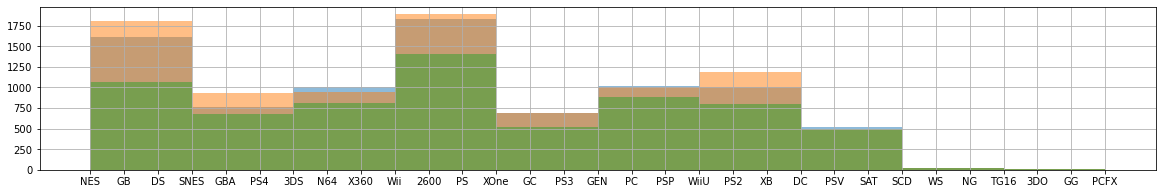

In [85]:
games_df.loc[games_df['critic_score'].isna(), 'platform'].hist(bins = 10, alpha = 0.5,
                                                               figsize = (20,3))   

games_df.loc[games_df['user_score'].isna(), 'platform'].hist(bins = 10, alpha = 0.5,
                                                               figsize = (20,3))

games_df.loc[games_df['rating'].isna(), 'platform'].hist(bins = 10, alpha = 0.5,
                                                               figsize = (20,3));

Distribution of missing values in relation to the year of release:

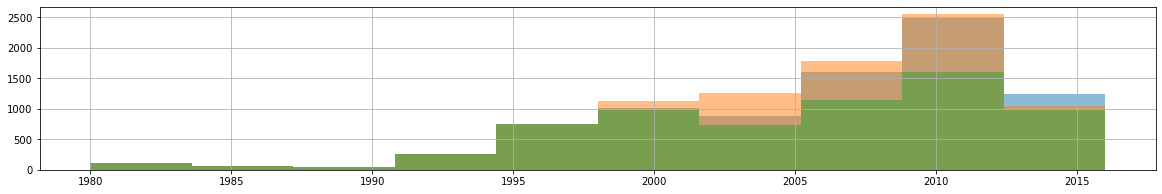

In [86]:
games_df.loc[games_df['critic_score'].isna(), 'year_of_release'].hist(bins = 10, alpha = 0.5,
                                                               figsize = (20,3))   

games_df.loc[games_df['user_score'].isna(), 'year_of_release'].hist(bins = 10, alpha = 0.5,
                                                               figsize = (20,3))

games_df.loc[games_df['rating'].isna(), 'year_of_release'].hist(bins = 10, alpha = 0.5,
                                                               figsize = (20,3));

Distribution of missing values in relation to genre:

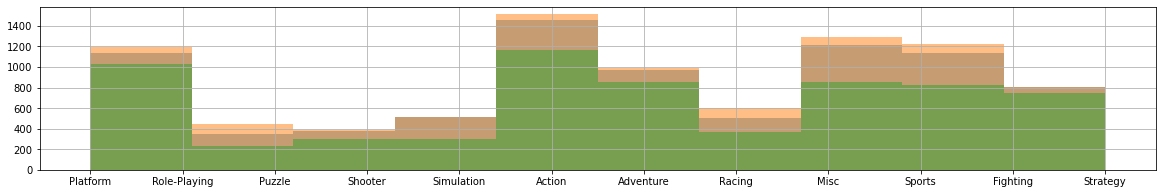

In [87]:
games_df.loc[games_df['critic_score'].isna(), 'genre'].hist(bins = 10, alpha = 0.5,
                                                               figsize = (20,3))   

games_df.loc[games_df['user_score'].isna(), 'genre'].hist(bins = 10, alpha = 0.5,
                                                               figsize = (20,3))

games_df.loc[games_df['rating'].isna(), 'genre'].hist(bins = 10, alpha = 0.5,
                                                               figsize = (20,3));

Based on the presented graphs of the distribution of missing values in the columns critic_score, user_score, rating, characterizing the popularity of games, it can be assumed that none of the considered characteristics directly affects the occurrence of gaps in the ratings of games by users.

The exact reason for the gaps in critics' ratings, user ratings and ratings is unknown. It could be assumed that these gaps may be due to the lack of the ability to leave ratings or assign a rating at the beginning of the development of the gaming industry, but the graph of the distribution of passes by year did not confirm this assumption.
At the same time, the presence of gaps in the data on the rating of the game may be due to the specifics of the organization that assigns them. In particular, ESRB is an organization that operates in the USA and Canada and assigns age ratings to games and is aimed primarily at its region North America. Probably, the lack of ratings for some games is due to their low distribution or its absence in the North America region.

Since the amount of gaps in the rating column is significant, and the data in this column is categorical, we will replace the existing gaps with the 'Unknown' category.

In [88]:
games_df['rating'] = games_df['rating'].fillna('Unknown')
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Calculate the total sales in all regions and record them in a separate column in the dataset:

In [89]:
games_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown


In [90]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
games_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31


## Research data analysis:

### Estimate the number of games that were released in different years:

To estimate the number of games, we will count their names in the 'name' column. In this case, there is a chance to take into account the same game twice, released in different years, for example on different platforms. However, we will not correct this, since the release of the same game on a new platform requires further development on the part of the game manufacturer and also indicates the development of the industry. 
At the same time, for the correctness of the calculation, we will check for duplicates in the columns 'name', 'year_of_release', 'platform'.

In [91]:
games_df.drop_duplicates(subset=['name', 'year_of_release', 'platform'], inplace=True)

In [92]:
games_per_year = games_df.pivot_table(index=['year_of_release'], values='name', aggfunc='count')
games_per_year
games_per_year.reset_index(inplace=True)
games_per_year.rename(columns = {'name' : 'released_games'}, inplace = True)
games_per_year

,year_of_release,released_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [93]:
games_per_year.value_counts()

year_of_release  released_games
1980             9                 1
1999             338               1
2001             482               1
2002             829               1
2003             775               1
2004             762               1
2005             939               1
2006             1006              1
2007             1197              1
2008             1427              1
2009             1426              1
2010             1255              1
2011             1136              1
2012             652               1
2013             544               1
2014             581               1
2015             606               1
2000             350               1
1998             379               1
1981             46                1
1997             289               1
1982             36                1
1983             17                1
1984             14                1
1985             14                1
1986             21                1
1987  

Text(0.5, 1.0, 'Released games per year')

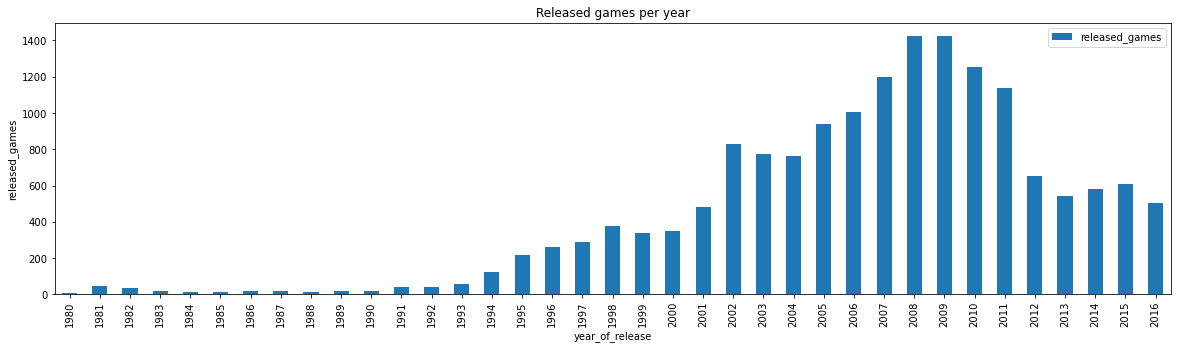

In [94]:
games_per_year.plot(x='year_of_release', y='released_games', kind='bar', figsize = (20, 5));
plt.ylabel('released_games')
plt.title('Released games per year')

In [95]:
games_per_year['released_games'].describe()

count      37.000000
mean      444.405405
std       451.591535
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: released_games, dtype: float64

(9.0, 1427.0)

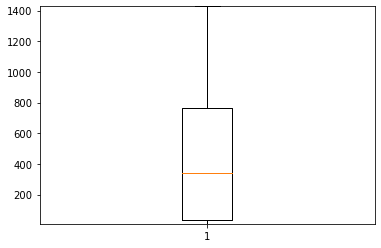

In [96]:
plt.boxplot(games_per_year['released_games'])
plt.ylim(9,1427) 

Based on the graphs and the distribution data request, we see that the data does not contain stuffing and is distributed normally. It can also be assumed that the development of the gaming industry is closely related to the development of the personal computer industry and their appearance in the life of the average person, as well as the subsequent spread of smartphones. So from 1980 to 1994, the number of games released is insignificant, then there are several jumps in the number of games released: in 1994, 1998, 2002 and 2005. From 2005 to 2008, there is a gradual increase in the number of games produced. From 2009 to 2016 - we see a decrease in the number of games produced relative to the indicators of 2008 and 2009 to the number of games produced in 2001-2002.

### Evaluate the impact of platforms on the number of sales:

#### Define the leading platforms by the number of sales:

Text(0.5, 1.0, 'Total sales per game')

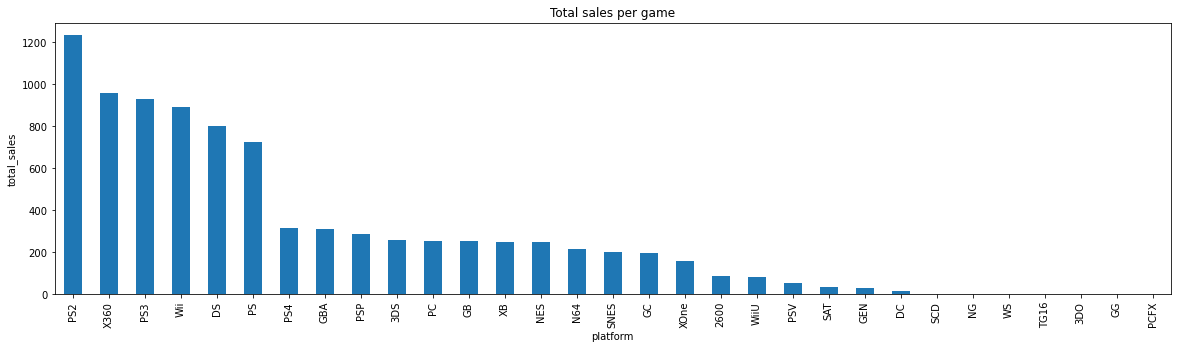

In [97]:
games_df.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(20,5))
plt.ylabel('total_sales')
plt.title('Total sales per game')

The leaders in the number of sales are the following platforms: PS2, X360, PS3, Wii, DS, PSP.

#### Study the distribution of sales of these platforms by year:

In [98]:
#filter the values of the table by the necessary conditions:
top_platforms = games_df[(games_df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']))]
top_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,Unknown,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


Text(0.5, 1.0, 'Total sales of top-6 games per year')

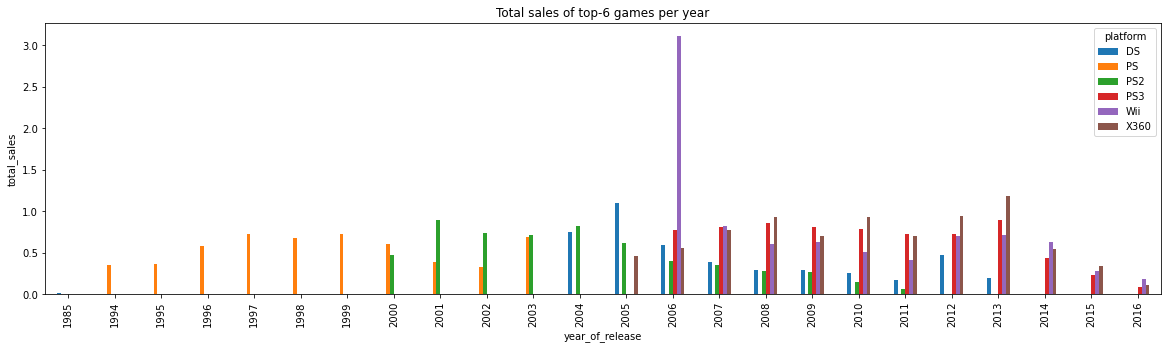

In [99]:
top_platforms_bar = top_platforms.pivot_table(values='total_sales', index = 'year_of_release', columns = 'platform')
top_platforms_bar.plot(kind='bar', figsize = (20, 5))
plt.ylabel('total_sales')
plt.title('Total sales of top-6 games per year')

Based on the sales distribution charts for the top 6 platforms with the highest number of sales, it follows that:
* The PS platform was active in 1994-2003;
* The PS2 platform was active in 2000-2011;
* The X360 platform was active in 2005-2016;
* The PS3 platform was active in 2006-2016;
* The Wii platform was active in 2006-2016, and in 2006 the number of sales to this platform was a record compared to other leading platforms;
* The DS platform was active in 2004-2013;
* probably as a result of the decline in popularity of the PS2 platform in 2005 (which coincides with the launch of the X360 platform), the creators of the PS2 decided to release the PS3 version in 2006;
* on average, the duration of the platform's activity is 10 years.

#### Identify the platforms that are leading in terms of the number of sales recently:

We will prepare a dataset with the most up-to-date data. To do this, let's turn to the distribution of the number of games released annually in 1980-2016, which we did earlier. Based on this graph, it can be seen that the decline of the gaming industry occurred in 2012, consider this period as the most relevant.

In [100]:
new_platforms = games_df[games_df['year_of_release'] > 2012]
len(new_platforms['platform'].unique())

11

Text(0, 0.5, 'total_sales')

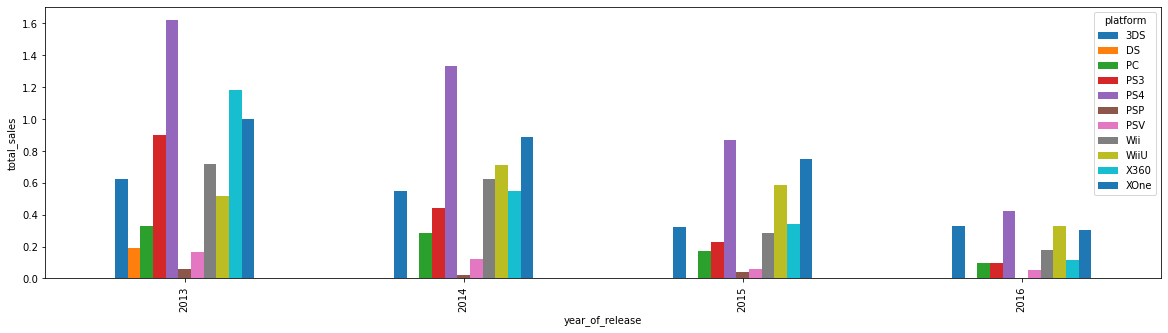

In [101]:
new_platforms_bar = new_platforms.pivot_table(values='total_sales', index = 'year_of_release', columns = 'platform')
new_platforms_bar.plot(kind='bar', figsize = (20, 5))
plt.ylabel('total_sales')

Based on the graph , we see the following:
* the number of games released is gradually decreasing annually;
* despite the decrease in the number of games, the leading platforms in sales are: PS4, 3DS, WiiU, XOne;
* DS, PSP - games stopped being released for these platforms by 2016.

In [102]:
actual_top_platforms = new_platforms[(new_platforms['platform'].isin(['PS4', '3DS', 'WiiU', 'XOne']))]
actual_top_platforms['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU'], dtype=object)

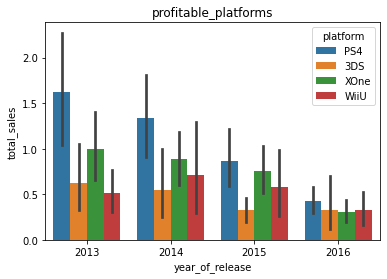

In [103]:
sns.barplot(y='total_sales', 
            x='year_of_release', 
            hue='platform', 
            data = actual_top_platforms)
plt.title('profitable_platforms')
plt.show()

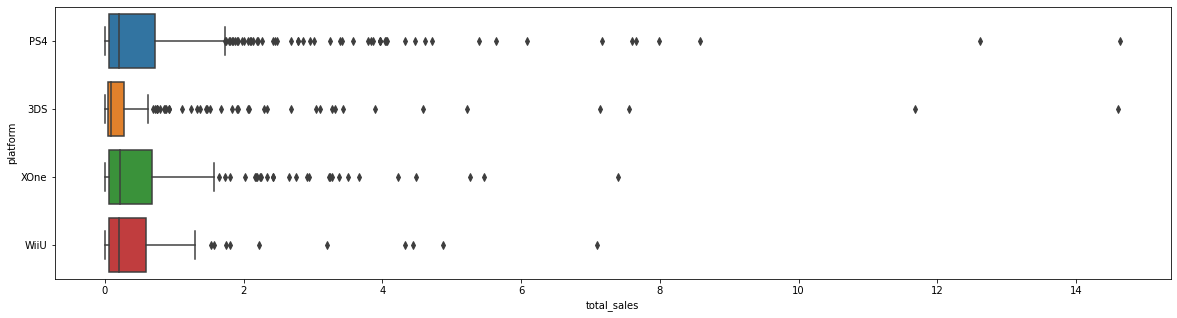

In [104]:
plt.figure(figsize=(20,5))
sns.boxplot(y='platform', x='total_sales',
            data = actual_top_platforms)
plt.show()

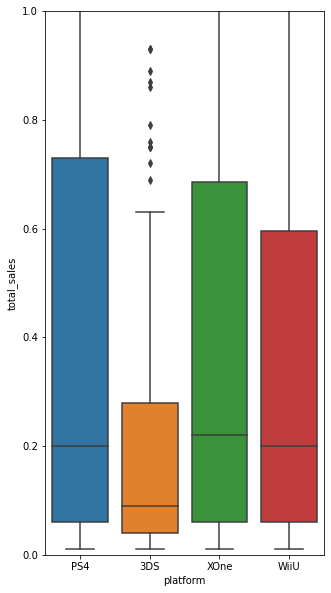

In [105]:
plt.figure(figsize=(5,10))
sns.boxplot(y='total_sales', x='platform',
            data = actual_top_platforms)

plt.ylim(0, 1)
plt.show()

Based on the graphs, it follows that the leading game sales platforms are distributed as follows: PS4, XOne, WiiU, 3DS. Although it should be noted that sales of PS4 and XOne are almost equal to each other.
We can notice that thanks to the boxplot chart, we see that the median sales of the XOne platform are slightly higher than the median sales of the PS4 platform - this suggests that the average purchase price on the XOne platform is higher than on the PS4 platform. Nevertheless, the PS4 platform is still in the lead - perhaps due to more sales. At the same time, the median and the location of the lower and upper quartiles of sales of the 3DS platform are lower than those of other platforms, which also indicates its less popular positions in relation to PS4, XOne, WiiU. Meanwhile, information about the presence of outliers has also become available to us - we do not know the exact reason, but we can assume that these outliers are the result of buying an additional option inside the game, which sometimes significantly increase the cost of the game.

#### Determine the impact on sales within the PS4 platform of user reviews and critics:

In [106]:
ps4_platform = new_platforms[new_platforms['platform'] == 'PS4']
ps4_platform['platform'].unique()

array(['PS4'], dtype=object)

In [107]:
ps4_platform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    int64  
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       257 non-null    float64
 10  rating           392 non-null    object 
 11  total_sales      392 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 39.8+ KB


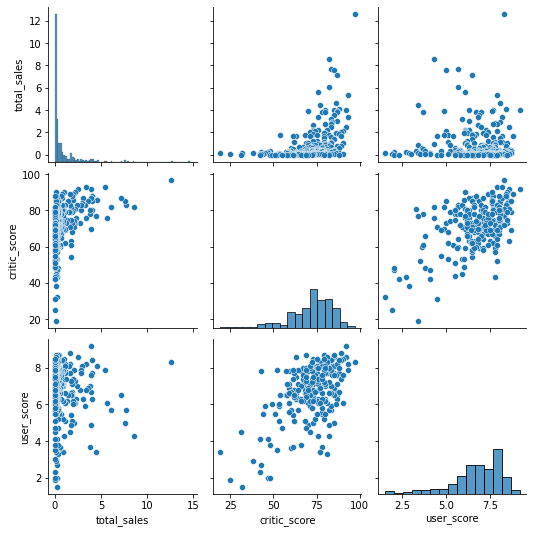

In [108]:
ps4_sales_vs_scores = sns.pairplot(ps4_platform[['total_sales','critic_score', 'user_score']])
plt.show()

Text(0.5, 1.0, 'heatmap PS4')

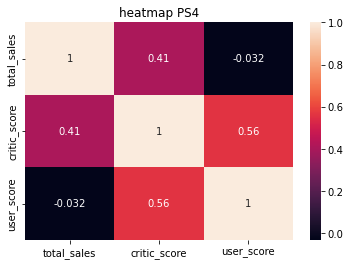

In [109]:
sns.heatmap(ps4_platform[['total_sales','critic_score', 'user_score']].corr(), annot = True)
plt.title('heatmap PS4')

Based on the graphs, it follows that:
* the correlation between user ratings and critics' ratings is average,
* correlation between critics' ratings and sales is weak,
* the correlation between user ratings and sales is negative and very weak, we can ignore it.

#### Сheck the validity of the above correlations for other profitable platforms:

Form a dataset for each of the profitable platforms:

In [110]:
three_ds_platform = new_platforms[new_platforms['platform'] == '3DS']
wiiu_platform = new_platforms[new_platforms['platform'] == 'WiiU']
xone_platform = new_platforms[new_platforms['platform'] == 'XOne']

Text(0.5, 1.0, 'heatmap 3DS')

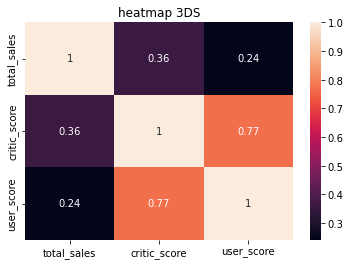

In [111]:
sns.heatmap(three_ds_platform[['total_sales','critic_score', 'user_score']].corr(), annot = True)
plt.title('heatmap 3DS')

Text(0.5, 1.0, 'heatmap WiiU')

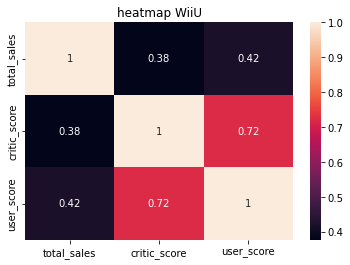

In [112]:
sns.heatmap(wiiu_platform[['total_sales','critic_score', 'user_score']].corr(), annot = True)
plt.title('heatmap WiiU')

Text(0.5, 1.0, 'heatmap XOne')

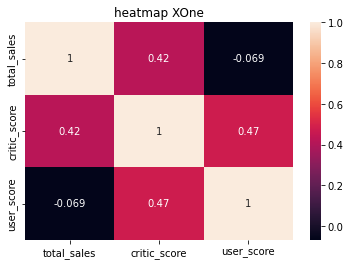

In [113]:
sns.heatmap(xone_platform[['total_sales','critic_score', 'user_score']].corr(), annot = True)
plt.title('heatmap XOne')

Based on the graphs, we see that:
* correlations true for PS4 are true for XOne;
* the correlation between user ratings and critics' ratings of the 3DS and WiiU platforms is high, while this correlation is average for the PS4 and XOne platforms;
* the correlation between critics' ratings and sales of the 3DS and WiiU platforms is weak, as is the PS4 platform or the XOne platform;
* the correlation between user ratings and sales of the 3DS and WiiU platforms (as with the PS4 platform or the XOne platform) is negative and very weak, we can ignore it.

Consequently, we can conclude that critics' ratings do not have a significant impact on the number of sales of games on the Internet platforms (the correlation is weak). User ratings also do not significantly affect the number of sales in any of the studied platforms (the correlation is negative and very weak, it can be ignored). At the same time, user ratings and critics' ratings are dependent on each other: for the PS4 and XOne platforms, this dependence is average, for the 3DS and WiiU platforms, it is high.

#### Identify the impact on the sales of games of their genres:

Consider average or median sales (total_sales) across all genres:

Text(0.5, 1.0, 'Profitability of games genres')

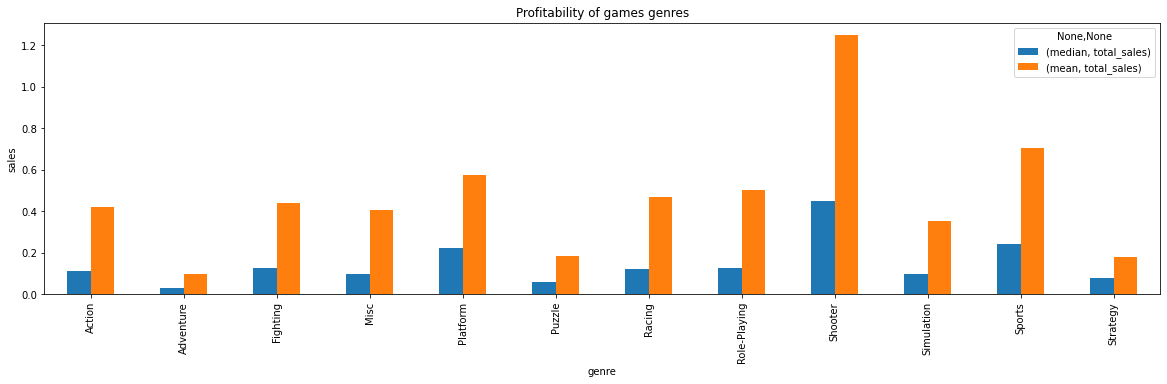

In [114]:
new_platforms.pivot_table(index = 'genre', values = ['total_sales'], aggfunc = ['median','mean']).plot(
    kind='bar', figsize=(20,5))
plt.ylabel('sales')
plt.title('Profitability of games genres')

Based on the graph, we see that the most profitable genres are the genres: Shooter, Sports, Platform.

## Make a user portrait for each region:

### Determine the top 5 popular platforms by the number of sales for each region (NA, EU, JP):

In [115]:
new_platforms.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

In [116]:
new_platforms.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [117]:
new_platforms.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).head(5)

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

The leaders among the sales platforms are:
* in North America - PS4, XOne, X360, PS3, 3DS;
* in Europe - PS4, PS3, XOne, X360, 3DS;
* in Japan - 3DS, PS3, PSV, PS4, WiiU.

Based on the results, the most popular platforms can be conditionally divided into the following categories: stationary (Playstation, Xbox) and portable (3DS, WiiU). Consequently, we see that in the regions of North America, Europe, stationary platforms are leading, among which Playstation takes the first place, Xbox takes the second place. In the Japan region, on the contrary, the 3DS portable platform is the leader, the Playstation platforms occupy 2-4 places, the WiiU portable platform occupies the 5th place. Perhaps such a difference in Japan is due to the specificity of the region, in particular, the presence of local manufacturers.

### Determine the top 5 popular genres by the number of sales for each region (NA, EU, JP):

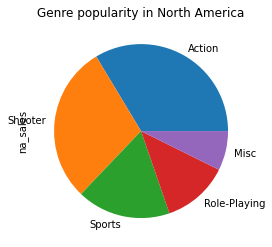

In [118]:
new_platforms.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='pie')
plt.title('Genre popularity in North America')
plt.show()

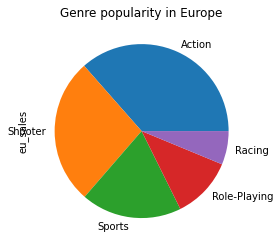

In [119]:
new_platforms.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='pie')
plt.title('Genre popularity in Europe')
plt.show()

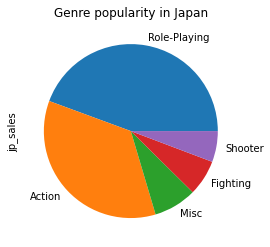

In [120]:
new_platforms.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='pie')
plt.title('Genre popularity in Japan')
plt.show()

The leaders among genres in sales are:
* in North America and Europe - the top 4 genres of games coincide, these are: 1st place - Action, 2nd place - Shooter, 3rd place - Sports, 4th place - Role-Playing. Completing the top 5 popular genres in each country are different genres: in North America - Inc, in Europe - Racing.
* in Japan, popular genres were distributed as follows: 1st place - Role-Playing, 2nd place - Action, 3rd place - Misc, 4th place - Fighting, 5th place - Shooter.

Probably, such a difference in popular genres between Japan and the regions of North America and Europe is due to the presence of other platforms that are more adapted to the genres of games popular in Japan (in Japan, portable platforms are widely used, whereas in the regions of North America and Europe, station platforms are popular).

### Check the impact of the ESRB rating on sales in a particular region (NA, EU, JP):

In [121]:
new_platforms.groupby(['rating'])['na_sales'].sum().sort_values(ascending=False)

rating
M          165.21
Unknown     89.42
E           79.05
E10+        54.24
T           49.79
Name: na_sales, dtype: float64

In [122]:
new_platforms.groupby(['rating'])['eu_sales'].sum().sort_values(ascending=False)

rating
M          145.32
E           83.36
Unknown     78.91
E10+        42.69
T           41.95
Name: eu_sales, dtype: float64

In [123]:
new_platforms.groupby(['rating'])['jp_sales'].sum().sort_values(ascending=False)

rating
Unknown    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
Name: jp_sales, dtype: float64

The most successful sales are games with the following age ratings:
* in North America - the distribution of age rating categories is the same: M (mature), Unknown, E (everyone), E10+ (everyone 10 y.o. and up), T (teenagers, 13 y.o. and up);
* in Europe - the distribution of age rating categories: M (mature), E (everyone), Unknown, E10+ (everyone 10 y.o. and up), T (teenagers, 13 y.o. and up);
* in Japan, the largest number of sales is distributed differently: Unknown, T (teenagers, 13 y.o. and up), E (everyone), M (mature), E10+ (everyone 10 y.o. and up).

The distribution of age rating categories in North America and Europe is generally similar. However, in North America, games with an indeterminate genre occupy the second place in popularity, while in Europe they occupy only the third place. Presumably, this may indicate that games produced outside the jurisdiction of the ESRB organization are common in North America and Europe.
Probably such a difference in popular genres between Japan and the regions of North America and Europe is due to the presence of other platforms that are more adapted to the genres of games popular in Japan (in Japan, portable platforms are widely used, the price availability of which is higher than stationary, whereas in the regions of North America and Europe, station platforms that are as a rule, they are more expensive than portable ones and are available to older players).

Thus, the most typical user is:
* in the North America and Europe region - an adult player who loves Action games and prefers the PS4 platform;
* in the Japan region, there is a teenager who loves Role-Playing games and prefers the 3DS platform.

## Hypothesis testing:

Hypotheses to be tested:
* The average user ratings of the Xbox One and PC platforms are the same.
* Average user ratings of Action and Sports genres are different.

### Formulate null and alternative hypotheses:

* Нулевая гипотеза №1: средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
* Альтернативная гипотеза №1: средние пользовательские рейтинги платформ Xbox One и PC разные.
* Нулевая гипотеза №2: средние пользовательские рейтинги жанров Action и Sports одинаковы.
* Альтернативная гипотеза №2: средние пользовательские рейтинги жанров Action и Sports разные.

### Test of hypotheses:

Prepare a dataset to test hypotheses, leaving rows that do not contain NA values in the user_score column.

In [124]:
df_check_hypothesis = new_platforms[new_platforms['user_score'].notna()]
df_check_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1192 non-null   object 
 1   platform         1192 non-null   object 
 2   year_of_release  1192 non-null   int64  
 3   genre            1192 non-null   object 
 4   na_sales         1192 non-null   float64
 5   eu_sales         1192 non-null   float64
 6   jp_sales         1192 non-null   float64
 7   other_sales      1192 non-null   float64
 8   critic_score     976 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1192 non-null   object 
 11  total_sales      1192 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 121.1+ KB


Test the first hypothesis:

In [125]:
xone_user_scores = df_check_hypothesis[df_check_hypothesis['platform'] == 'XOne']['user_score']
pc_user_scores = df_check_hypothesis[df_check_hypothesis['platform'] == 'PC']['user_score']

alpha = .05
print('Average user rating XOne:', xone_user_scores.mean())
print('Average user rating PC:', pc_user_scores.mean())

results = st.ttest_ind(
    xone_user_scores,
    pc_user_scores) 

print("p-value:", results.pvalue)
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

Average user rating XOne: 6.52142857142857
Average user rating PC: 6.269677419354836
p-value: 0.14012658403611647
It was not possible to reject the null hypothesis


Since it follows from the test results that the null hypothesis cannot be rejected, we can conclude that, provided that the null hypothesis is true, there is a probability of its viability and we cannot reject it. This is also indicated by the calculation of the average values of the user rating of XOne (approximately 6.52) and PC (approximately 6.26), which are close.

Test the second hypothesis:

In [126]:
action_user_scores = df_check_hypothesis[df_check_hypothesis['genre'] == 'Action']['user_score']
sports_user_scores = df_check_hypothesis[df_check_hypothesis['genre'] == 'Sports']['user_score']

alpha = .05
print('Average user rating Action:', action_user_scores.mean())
print('Average user rating Sports:', sports_user_scores.mean())

results = st.ttest_ind(
    action_user_scores,
    sports_user_scores) 

print("p-vale:", results.pvalue)
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

Average user rating Action: 6.837532133676097
Average user rating Sports: 5.238124999999999
p-vale: 1.0517832389140023e-27
Reject the null hypothesis


From the test results on the available data, at the significance level of 5% (the confidence level of 95%), there are reasons to reject the null hypothesis in favor of an alternative: the average user ratings of the Action and Sports genres are different.

## Overall conclusion:

To prepare this analysis, a preliminary overview of the data has been carried out, gaps have been identified and evaluated in terms of their critical impact on the study, column names have been changed to correct, incorrect dataframe data types have been corrected. In general, it can be noted that the data is without significant anomalies, a significant number of gaps has taken place in the columns with the ratings of critics and users, but they have not affected the calculation of the number of sales of games, so it has been decided to leave them. Next, the total number of sales for all regions was calculated for each game. These data served as the basis for the subsequent research analysis of game sales.

As part of the research data analysis, the following have been analyzed: 
* the number of games released annually, which allowed us to assess the market for the development of the gaming industry;
* gaming platforms, their impact on game sales and the average period of their relevance;
* game genres and their impact on game sales.

It has been revealed that the development of the gaming industry is closely related to the development of the personal computer industry and their appearance in the life of the average person, as well as the subsequent spread of smartphones. So from 1980 to 1994, the number of games released is insignificant, then there are several jumps in the number of games released, namely: in 1994, 1998, 2002 and 2005. From 2005 to 2008, there is a gradual increase in the number of games produced. From 2009 to 2016 - we see a decrease in the number of games produced relative to the indicators of 2008 and 2009 to the number of games produced in 2001-2002.

It has been revealed that the average duration of the platform's activity is 10 years. On the DS, PSP platforms, games stopped being released by 2016. Platforms PS4, XOne, WiiU,3DS are the leaders in the number of sales in the period from 2013 to 2016. 

It has been also possible to determine that critics' ratings and user ratings do not have a significant impact on the number of sales of games on the platforms under study.

According to data for 2016, the most successful in terms of sales were Shooter genre games, followed by Sports and Platform genres.

Also in the course of the study, a portrait of a typical user has been formed:
* in the North America and Europe region - an adult player who loves Action games, preferring the PS4 platform;
* in the Japan region, there is a teenager who loves Role-Playing games and prefers the 3DS platform.

Two hypotheses have been tested during the study. As a result, null hypothesis No. 1 "average user ratings of Xbox One and PC platforms are the same" could not be rejected, and null hypothesis No. 2 "average user ratings of Action and Sports genres are the same" has a low probability of being realized, and the hypothesis "average user ratings of Action and Sports genres are different" is more likely.

Thus, according to the data for 2016, the increase in the number of sales will contribute to the following:
* support for games that are implemented on platforms that were created less than 10 years ago, for example, on platforms: PS4, XOne, WiiU, 3DS;
* support for Shooter, Sports and Platform games;
* depending on the goals, adhere to the features of the implementation of games existing in Japan, North America and Europe. At the same time, the markets of North America and Europe have many common features.